This project introduces DNN-s and CNN-s by using tensorflow and keras on the CIFAR10 dataset.

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2024-01-23 08:47:30.481918: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-23 08:47:30.519337: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-23 08:47:30.519380: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-23 08:47:30.520640: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-23 08:47:30.527200: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-23 08:47:30.527811: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [19]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
[6]


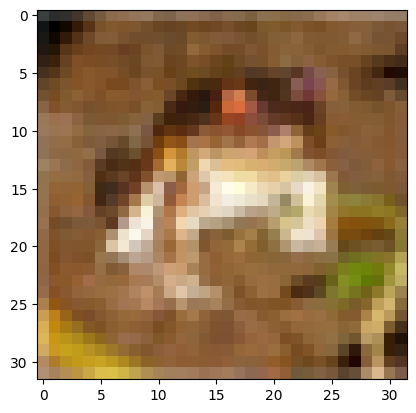

In [6]:
# lets look at the data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# lets look at the first image
print(y_train[0])
plt.imshow(x_train[0])
plt.show()

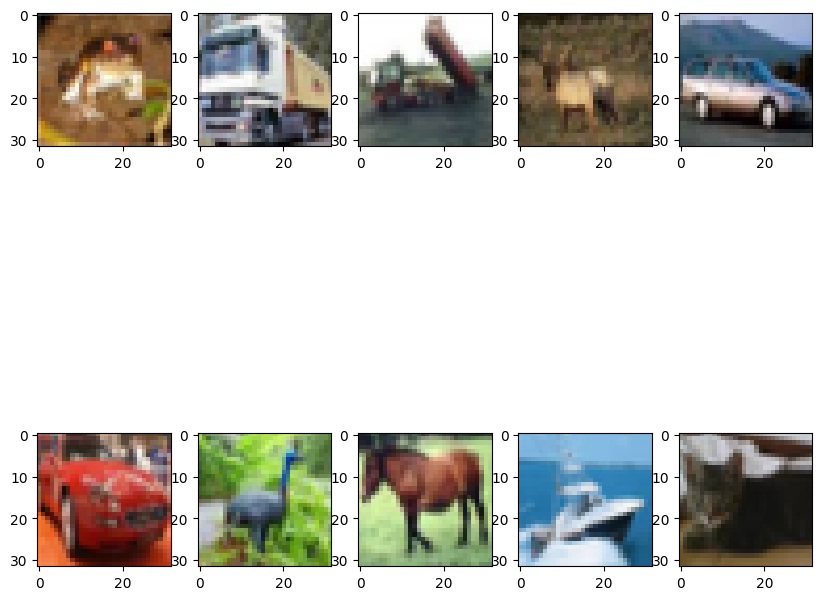

In [7]:
# lets see the first 10 images
fig = plt.figure(figsize=(10, 10))
for i in range(10):
    ax = fig.add_subplot(2, 5, i + 1)
    ax.imshow(x_train[i])

In [11]:
# lets see some more info about the data
# the type of the data
print(x_train.dtype)
print(y_train.dtype)

# the number of classes 
labels = np.unique(y_train)
print(labels)
print(labels.shape)

# the number of images in each class
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

uint8
uint8
[0 1 2 3 4 5 6 7 8 9]
(10,)
{0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}


In [25]:
# lets normalize the data to be between 0 and 1
x_train_f = x_train.astype('float') / 255.
x_test_f = x_test.astype('float') / 255.

print(x_train[0].max())
print(x_train_f[0].max())

255
1.0


In [27]:
# lets also convert the labels to one-hot encoding
y_train_oh = tf.keras.utils.to_categorical(y_train, num_classes=labels.size)
y_test_oh = tf.keras.utils.to_categorical(y_test, num_classes=labels.size)

print(y_train[0])
print(y_train_oh[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [28]:
# lets use Keras to build a dense network with 3 hidden layers, using Sequential and Dense

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3))) # input layer that also flattens the input
model.add(tf.keras.layers.Dense(128, activation='relu')) 
model.add(tf.keras.layers.Dense(128, activation='relu')) 
model.add(tf.keras.layers.Dense(128, activation='relu')) 
model.add(tf.keras.layers.Dense(labels.size, activation='softmax')) # output layer

In [29]:
# we train the model using the fit method
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_f, y_train_oh, epochs=10, batch_size=32)

Epoch 1/10


2024-01-23 09:04:49.119141: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 8s 5ms/step - loss: 1.8530 - accuracy: 0.3240
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6798 - accuracy: 0.3969
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6100 - accuracy: 0.4193
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5631 - accuracy: 0.4402
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5255 - accuracy: 0.4530
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5053 - accuracy: 0.4584
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4821 - accuracy: 0.4684
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4634 - accuracy: 0.4749
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4422 - accuracy: 0.4810
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4283 - accurac

In [30]:
# the loss and the accuracy hadn't stabilized yet, lets train the model for 10 more epochs
model.fit(x_train_f, y_train_oh, epochs=10, batch_size=32)

Epoch 1/10
  21/1563 [..............................] - ETA: 8s - loss: 1.3876 - accuracy: 0.4866

2024-01-23 09:07:41.525016: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 7s 5ms/step - loss: 1.4153 - accuracy: 0.4910
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4046 - accuracy: 0.4950
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3872 - accuracy: 0.5015
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3783 - accuracy: 0.5038
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3664 - accuracy: 0.5060
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3608 - accuracy: 0.5091
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3466 - accuracy: 0.5161
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3383 - accuracy: 0.5179
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3297 - accuracy: 0.5205
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3182 - accurac

In [31]:
# the metrics are still not stabilized, lets use callbacks to stop the training when the accuracy stops improving
# we use the EarlyStopping callback

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
model.fit(x_train_f, y_train_oh, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
  11/1250 [..............................] - ETA: 6s - loss: 1.3014 - accuracy: 0.5256 

2024-01-23 09:16:08.610077: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


1250/1250 [==============================] - 7s 5ms/step - loss: 1.3072 - accuracy: 0.5276 - val_loss: 1.3158 - val_accuracy: 0.5273
Epoch 2/100
1250/1250 [==============================] - 7s 5ms/step - loss: 1.2946 - accuracy: 0.5317 - val_loss: 1.3127 - val_accuracy: 0.5334
Epoch 3/100
1250/1250 [==============================] - 7s 6ms/step - loss: 1.2857 - accuracy: 0.5342 - val_loss: 1.3632 - val_accuracy: 0.5206
Epoch 4/100
1250/1250 [==============================] - 7s 5ms/step - loss: 1.2716 - accuracy: 0.5408 - val_loss: 1.3377 - val_accuracy: 0.5268
Epoch 5/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2683 - accuracy: 0.5414 - val_loss: 1.3514 - val_accuracy: 0.5159


In [32]:
# lets evaluate the model on the test set
model.evaluate(x_test_f, y_test_oh)

313/313 [==============================] - 1s 2ms/step - loss: 1.4752 - accuracy: 0.4873


[1.4752269983291626, 0.48730000853538513]

In [33]:
# lets try another architecture with variable size of the hidden layers

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3))) 
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(labels.size, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_f, y_train_oh, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

model.evaluate(x_test_f, y_test_oh)


Epoch 1/100


2024-01-23 09:20:34.083748: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


1250/1250 [==============================] - 25s 20ms/step - loss: 1.8826 - accuracy: 0.3144 - val_loss: 1.7415 - val_accuracy: 0.3874
Epoch 2/100
1250/1250 [==============================] - 26s 21ms/step - loss: 1.7012 - accuracy: 0.3879 - val_loss: 1.7133 - val_accuracy: 0.3872
Epoch 3/100
1250/1250 [==============================] - 24s 19ms/step - loss: 1.6193 - accuracy: 0.4191 - val_loss: 1.6658 - val_accuracy: 0.4152
Epoch 4/100
1250/1250 [==============================] - 24s 19ms/step - loss: 1.5623 - accuracy: 0.4392 - val_loss: 1.6014 - val_accuracy: 0.4311
Epoch 5/100
1250/1250 [==============================] - 23s 18ms/step - loss: 1.5162 - accuracy: 0.4563 - val_loss: 1.5927 - val_accuracy: 0.4442
Epoch 6/100
1250/1250 [==============================] - 24s 20ms/step - loss: 1.4837 - accuracy: 0.4697 - val_loss: 1.5601 - val_accuracy: 0.4432
Epoch 7/100
1250/1250 [==============================] - 26s 21ms/step - loss: 1.4526 - accuracy: 0.4793 - val_loss: 1.5386 - val_

Ultimately, DNN models aren't optimal for recognizing visual information. 

In [35]:
# lets try another model this time with convolutional layers

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) # convolutional layer
model.add(tf.keras.layers.MaxPooling2D((2, 2))) # pooling layer
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu')) # convolutional layer
model.add(tf.keras.layers.MaxPooling2D((2, 2))) # pooling layer
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu')) # convolutional layer
model.add(tf.keras.layers.Flatten()) # flattening layer
model.add(tf.keras.layers.Dense(64, activation='relu')) # dense layer
model.add(tf.keras.layers.Dense(labels.size, activation='softmax')) # output layer


In [37]:
# lets compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_f, y_train_oh, epochs=20, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/20


2024-01-23 09:29:46.865954: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 552960000 exceeds 10% of free system memory.


1407/1407 [==============================] - 21s 14ms/step - loss: 1.5660 - accuracy: 0.4286 - val_loss: 1.2923 - val_accuracy: 0.5360
Epoch 2/20
1407/1407 [==============================] - 20s 14ms/step - loss: 1.1999 - accuracy: 0.5735 - val_loss: 1.0788 - val_accuracy: 0.6224
Epoch 3/20
1407/1407 [==============================] - 20s 14ms/step - loss: 1.0396 - accuracy: 0.6334 - val_loss: 1.0349 - val_accuracy: 0.6378
Epoch 4/20
1407/1407 [==============================] - 19s 13ms/step - loss: 0.9416 - accuracy: 0.6690 - val_loss: 0.9644 - val_accuracy: 0.6678
Epoch 5/20
1407/1407 [==============================] - 21s 15ms/step - loss: 0.8658 - accuracy: 0.6980 - val_loss: 0.9100 - val_accuracy: 0.6830
Epoch 6/20
1407/1407 [==============================] - 18s 13ms/step - loss: 0.8133 - accuracy: 0.7145 - val_loss: 0.8999 - val_accuracy: 0.6862
Epoch 7/20
1407/1407 [==============================] - 19s 14ms/step - loss: 0.7695 - accuracy: 0.7314 - val_loss: 0.8493 - val_accura

In [38]:
# lets evaluate the model on the test set
model.evaluate(x_test_f, y_test_oh)

313/313 [==============================] - 1s 4ms/step - loss: 0.9125 - accuracy: 0.7018


[0.9125158190727234, 0.7017999887466431]

We see a substential improvement

In [44]:
# lets use data augmentation to increase the size of the training set

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

datagen.fit(x_train_f)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) 
model.add(tf.keras.layers.MaxPooling2D((2, 2))) 
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu')) 
model.add(tf.keras.layers.Dense(labels.size, activation='softmax')) 

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(datagen.flow(x_train_f, y_train_oh, batch_size=32), epochs=20, validation_data=(x_test_f, y_test_oh), callbacks=[early_stopping])

model.evaluate(x_test_f, y_test_oh)


Epoch 1/20
1563/1563 [==============================] - 41s 26ms/step - loss: 1.6525 - accuracy: 0.3905 - val_loss: 1.3722 - val_accuracy: 0.4982
Epoch 2/20
1563/1563 [==============================] - 39s 25ms/step - loss: 1.3585 - accuracy: 0.5111 - val_loss: 1.2207 - val_accuracy: 0.5677
Epoch 3/20
1563/1563 [==============================] - 39s 25ms/step - loss: 1.2429 - accuracy: 0.5556 - val_loss: 1.1875 - val_accuracy: 0.5854
Epoch 4/20
1563/1563 [==============================] - 40s 26ms/step - loss: 1.1677 - accuracy: 0.5851 - val_loss: 1.0662 - val_accuracy: 0.6232
Epoch 5/20
1563/1563 [==============================] - 37s 24ms/step - loss: 1.1173 - accuracy: 0.6058 - val_loss: 0.9994 - val_accuracy: 0.6541
Epoch 6/20
1563/1563 [==============================] - 38s 24ms/step - loss: 1.0810 - accuracy: 0.6181 - val_loss: 1.0213 - val_accuracy: 0.6484
Epoch 7/20
1563/1563 [==============================] - 38s 25ms/step - loss: 1.0417 - accuracy: 0.6307 - val_loss: 0.9319 -

[0.8761390447616577, 0.7081000208854675]

The early stopping wasn't triggered, but we'll move one

In [45]:
# lets try to add dropout to the model

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2)) # dropout layer
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2)) # dropout layer
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(labels.size, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(datagen.flow(x_train_f, y_train_oh, batch_size=32), epochs=25, validation_data=(x_test_f, y_test_oh), callbacks=[early_stopping])

Epoch 1/25
1563/1563 [==============================] - 42s 27ms/step - loss: 1.6343 - accuracy: 0.3999 - val_loss: 1.3118 - val_accuracy: 0.5141
Epoch 2/25
1563/1563 [==============================] - 40s 26ms/step - loss: 1.3474 - accuracy: 0.5161 - val_loss: 1.1695 - val_accuracy: 0.5788
Epoch 3/25
1563/1563 [==============================] - 43s 28ms/step - loss: 1.2427 - accuracy: 0.5557 - val_loss: 1.0586 - val_accuracy: 0.6239
Epoch 4/25
1563/1563 [==============================] - 42s 27ms/step - loss: 1.1812 - accuracy: 0.5772 - val_loss: 1.0153 - val_accuracy: 0.6442
Epoch 5/25
1563/1563 [==============================] - 40s 26ms/step - loss: 1.1369 - accuracy: 0.5975 - val_loss: 0.9657 - val_accuracy: 0.6605
Epoch 6/25
1563/1563 [==============================] - 42s 27ms/step - loss: 1.0898 - accuracy: 0.6127 - val_loss: 0.9204 - val_accuracy: 0.6778
Epoch 7/25
1563/1563 [==============================] - 41s 26ms/step - loss: 1.0651 - accuracy: 0.6226 - val_loss: 0.9355 -

In [46]:
model.evaluate(x_test_f, y_test_oh)

313/313 [==============================] - 1s 4ms/step - loss: 0.8706 - accuracy: 0.6974


[0.8705735206604004, 0.6973999738693237]

In [47]:
# lets add batch normalization

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.BatchNormalization()) # batch normalization layer
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization()) # batch normalization layer
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(labels.size, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(datagen.flow(x_train_f, y_train_oh, batch_size=32), epochs=25, validation_data=(x_test_f, y_test_oh), callbacks=[early_stopping])

Epoch 1/25
1563/1563 [==============================] - 50s 31ms/step - loss: 1.5849 - accuracy: 0.4243 - val_loss: 1.4522 - val_accuracy: 0.4701
Epoch 2/25
1563/1563 [==============================] - 49s 32ms/step - loss: 1.3109 - accuracy: 0.5337 - val_loss: 1.4760 - val_accuracy: 0.5003
Epoch 3/25
1563/1563 [==============================] - 49s 31ms/step - loss: 1.1992 - accuracy: 0.5759 - val_loss: 1.0072 - val_accuracy: 0.6419
Epoch 4/25
1563/1563 [==============================] - 50s 32ms/step - loss: 1.1286 - accuracy: 0.6030 - val_loss: 1.0139 - val_accuracy: 0.6468
Epoch 5/25
1563/1563 [==============================] - 51s 33ms/step - loss: 1.0820 - accuracy: 0.6198 - val_loss: 1.0311 - val_accuracy: 0.6428
Epoch 6/25
1563/1563 [==============================] - 50s 32ms/step - loss: 1.0408 - accuracy: 0.6367 - val_loss: 1.1032 - val_accuracy: 0.6178
Epoch 7/25
1563/1563 [==============================] - 47s 30ms/step - loss: 1.0035 - accuracy: 0.6473 - val_loss: 0.8997 -

In [48]:
model.evaluate(x_test_f, y_test_oh)

313/313 [==============================] - 2s 6ms/step - loss: 0.8997 - accuracy: 0.6878


[0.8996649384498596, 0.6877999901771545]